# Disease Prediction Project

### Importing Librarires

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from scipy.stats import mode

In [6]:
train_ds = pd.read_csv(r"C:\Users\PRINCE\Documents\Disease Prediction\Training.csv")
test_ds = pd.read_csv(r"C:\Users\PRINCE\Documents\Disease Prediction\Testing.csv")

In [10]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [11]:
train_ds.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [14]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [15]:
test_ds.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [38]:
train_ds.columns[0: ]

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [40]:
train_ds.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


Paralysis (brain hemorrhage)               120
Malaria                                    120
Drug Reaction                              120
Hyperthyroidism                            120
Typhoid                                    120
Hypoglycemia                               120
Hypothyroidism                             120
Bronchial Asthma                           120
Peptic ulcer diseae                        120
Chronic cholestasis                        120
Hepatitis E                                120
Gastroenteritis                            120
Acne                                       120
Allergy                                    120
Jaundice                                   120
Urinary tract infection                    120
Hypertension                               120
Cervical spondylosis                       120
Pneumonia                                  120
Hepatitis B                                120
Osteoarthristis                            120
Dimorphic hem

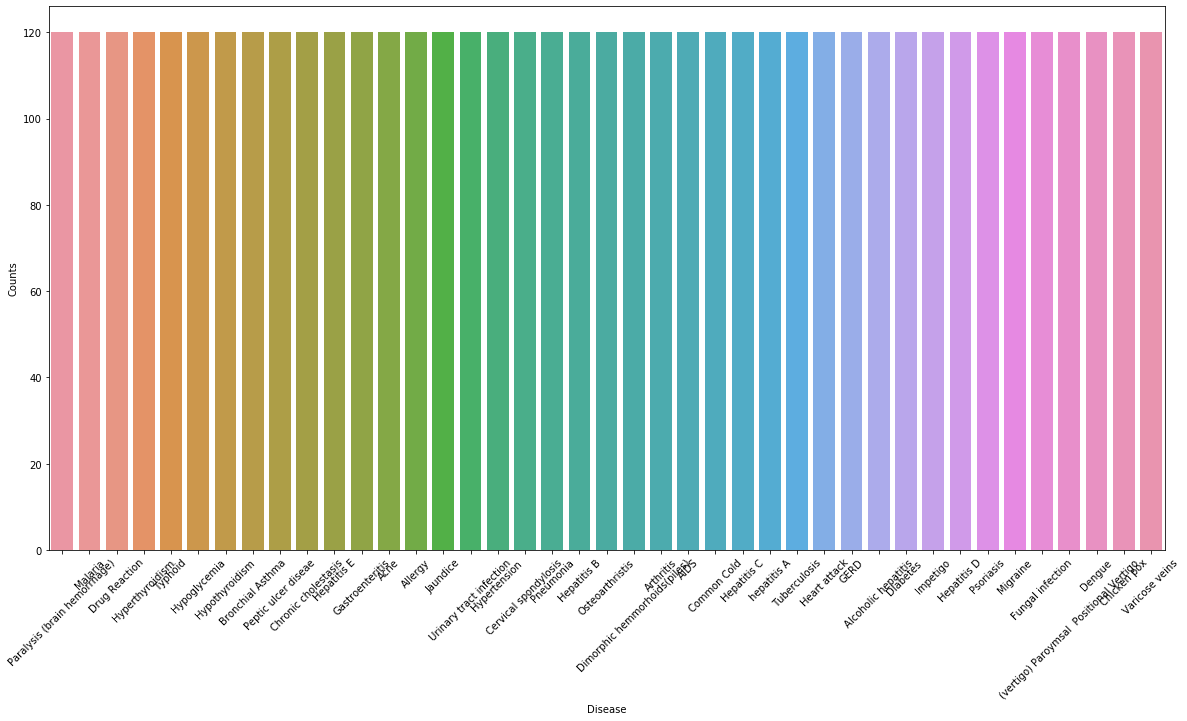

In [19]:
# checking for balanced data
all_diseases = train_ds["prognosis"].value_counts()
disease_chart = pd.DataFrame({
    "Disease": all_diseases.index,
    "Counts": all_diseases.values
})

plt.figure(figsize = (20,10))
sns.barplot(x = "Disease", y = "Counts", data = disease_chart)
plt.xticks(rotation=45)
print(all_diseases)
plt.show()

Fungal infection                           2
Dengue                                     1
Cervical spondylosis                       1
Drug Reaction                              1
Pneumonia                                  1
Gastroenteritis                            1
Common Cold                                1
Chicken pox                                1
Varicose veins                             1
Hepatitis E                                1
Osteoarthristis                            1
Psoriasis                                  1
Hepatitis D                                1
Migraine                                   1
Diabetes                                   1
Hypoglycemia                               1
Hepatitis C                                1
hepatitis A                                1
Allergy                                    1
Arthritis                                  1
GERD                                       1
Tuberculosis                               1
Hypertensi

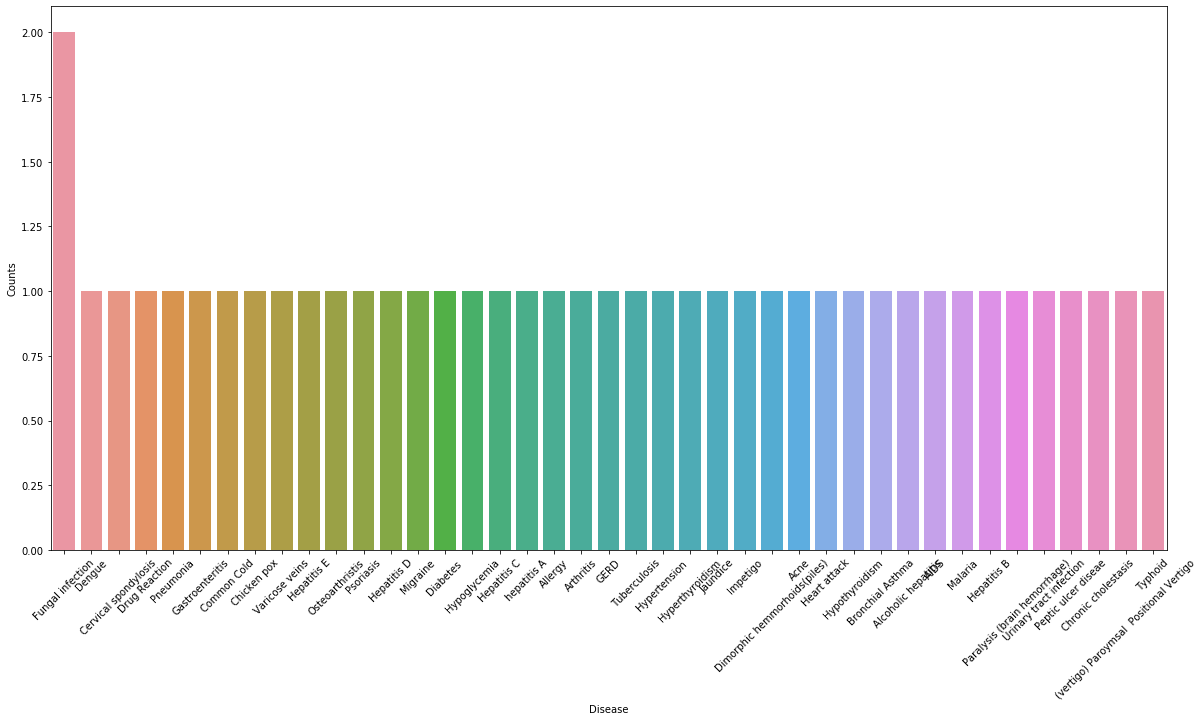

In [20]:
all_diseases_test = test_ds["prognosis"].value_counts()
disease_chart_test = pd.DataFrame({
    "Disease": all_diseases_test.index,
    "Counts": all_diseases_test.values
})

plt.figure(figsize = (20,10))
sns.barplot(x = "Disease", y = "Counts", data = disease_chart_test)
plt.xticks(rotation=45)
print(all_diseases_test)
plt.show()

In [42]:
train_ds.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
test_ds.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.166667,0.190476,0.023810,0.047619,0.023810,0.166667,0.142857,0.047619,0.047619,0.023810,...,0.023810,0.023810,0.023810,0.047619,0.023810,0.023810,0.023810,0.023810,0.047619,0.023810
std,0.377195,0.397437,0.154303,0.215540,0.154303,0.377195,0.354169,0.215540,0.215540,0.154303,...,0.154303,0.154303,0.154303,0.215540,0.154303,0.154303,0.154303,0.154303,0.215540,0.154303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
train_ds["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [44]:
train_ds.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

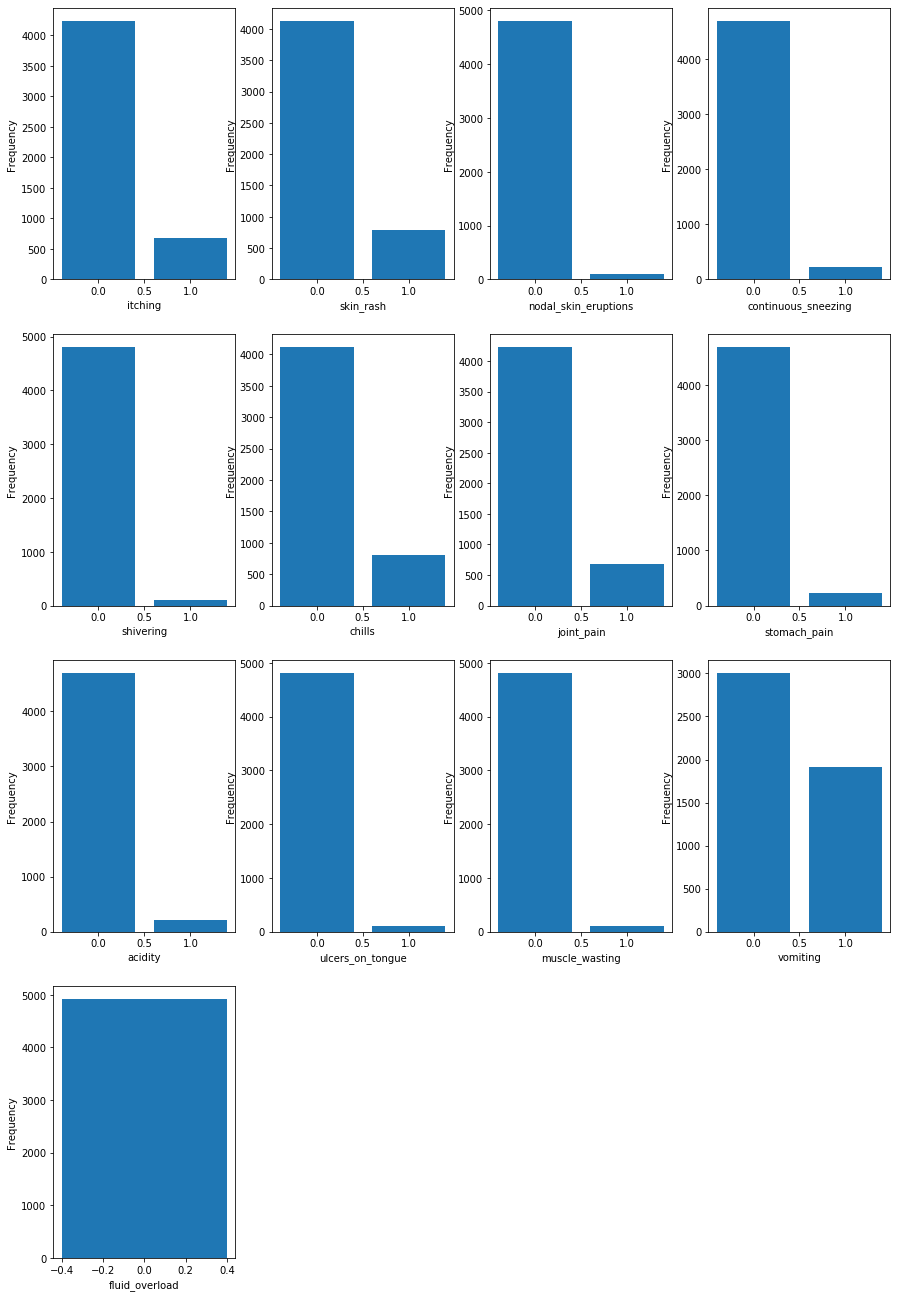

In [60]:
features = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue','muscle_wasting','vomiting', 'fluid_overload'] 
plt.figure(figsize = (15,23)) 
for i, feature in enumerate(features): 
    plt.subplot(4,4,i+1) 
    plt.bar(train_ds[feature].value_counts().index.to_numpy(), train_ds[feature].value_counts().values) 
    plt.xlabel(feature) 
    plt.ylabel("Frequency") 
plt.show()

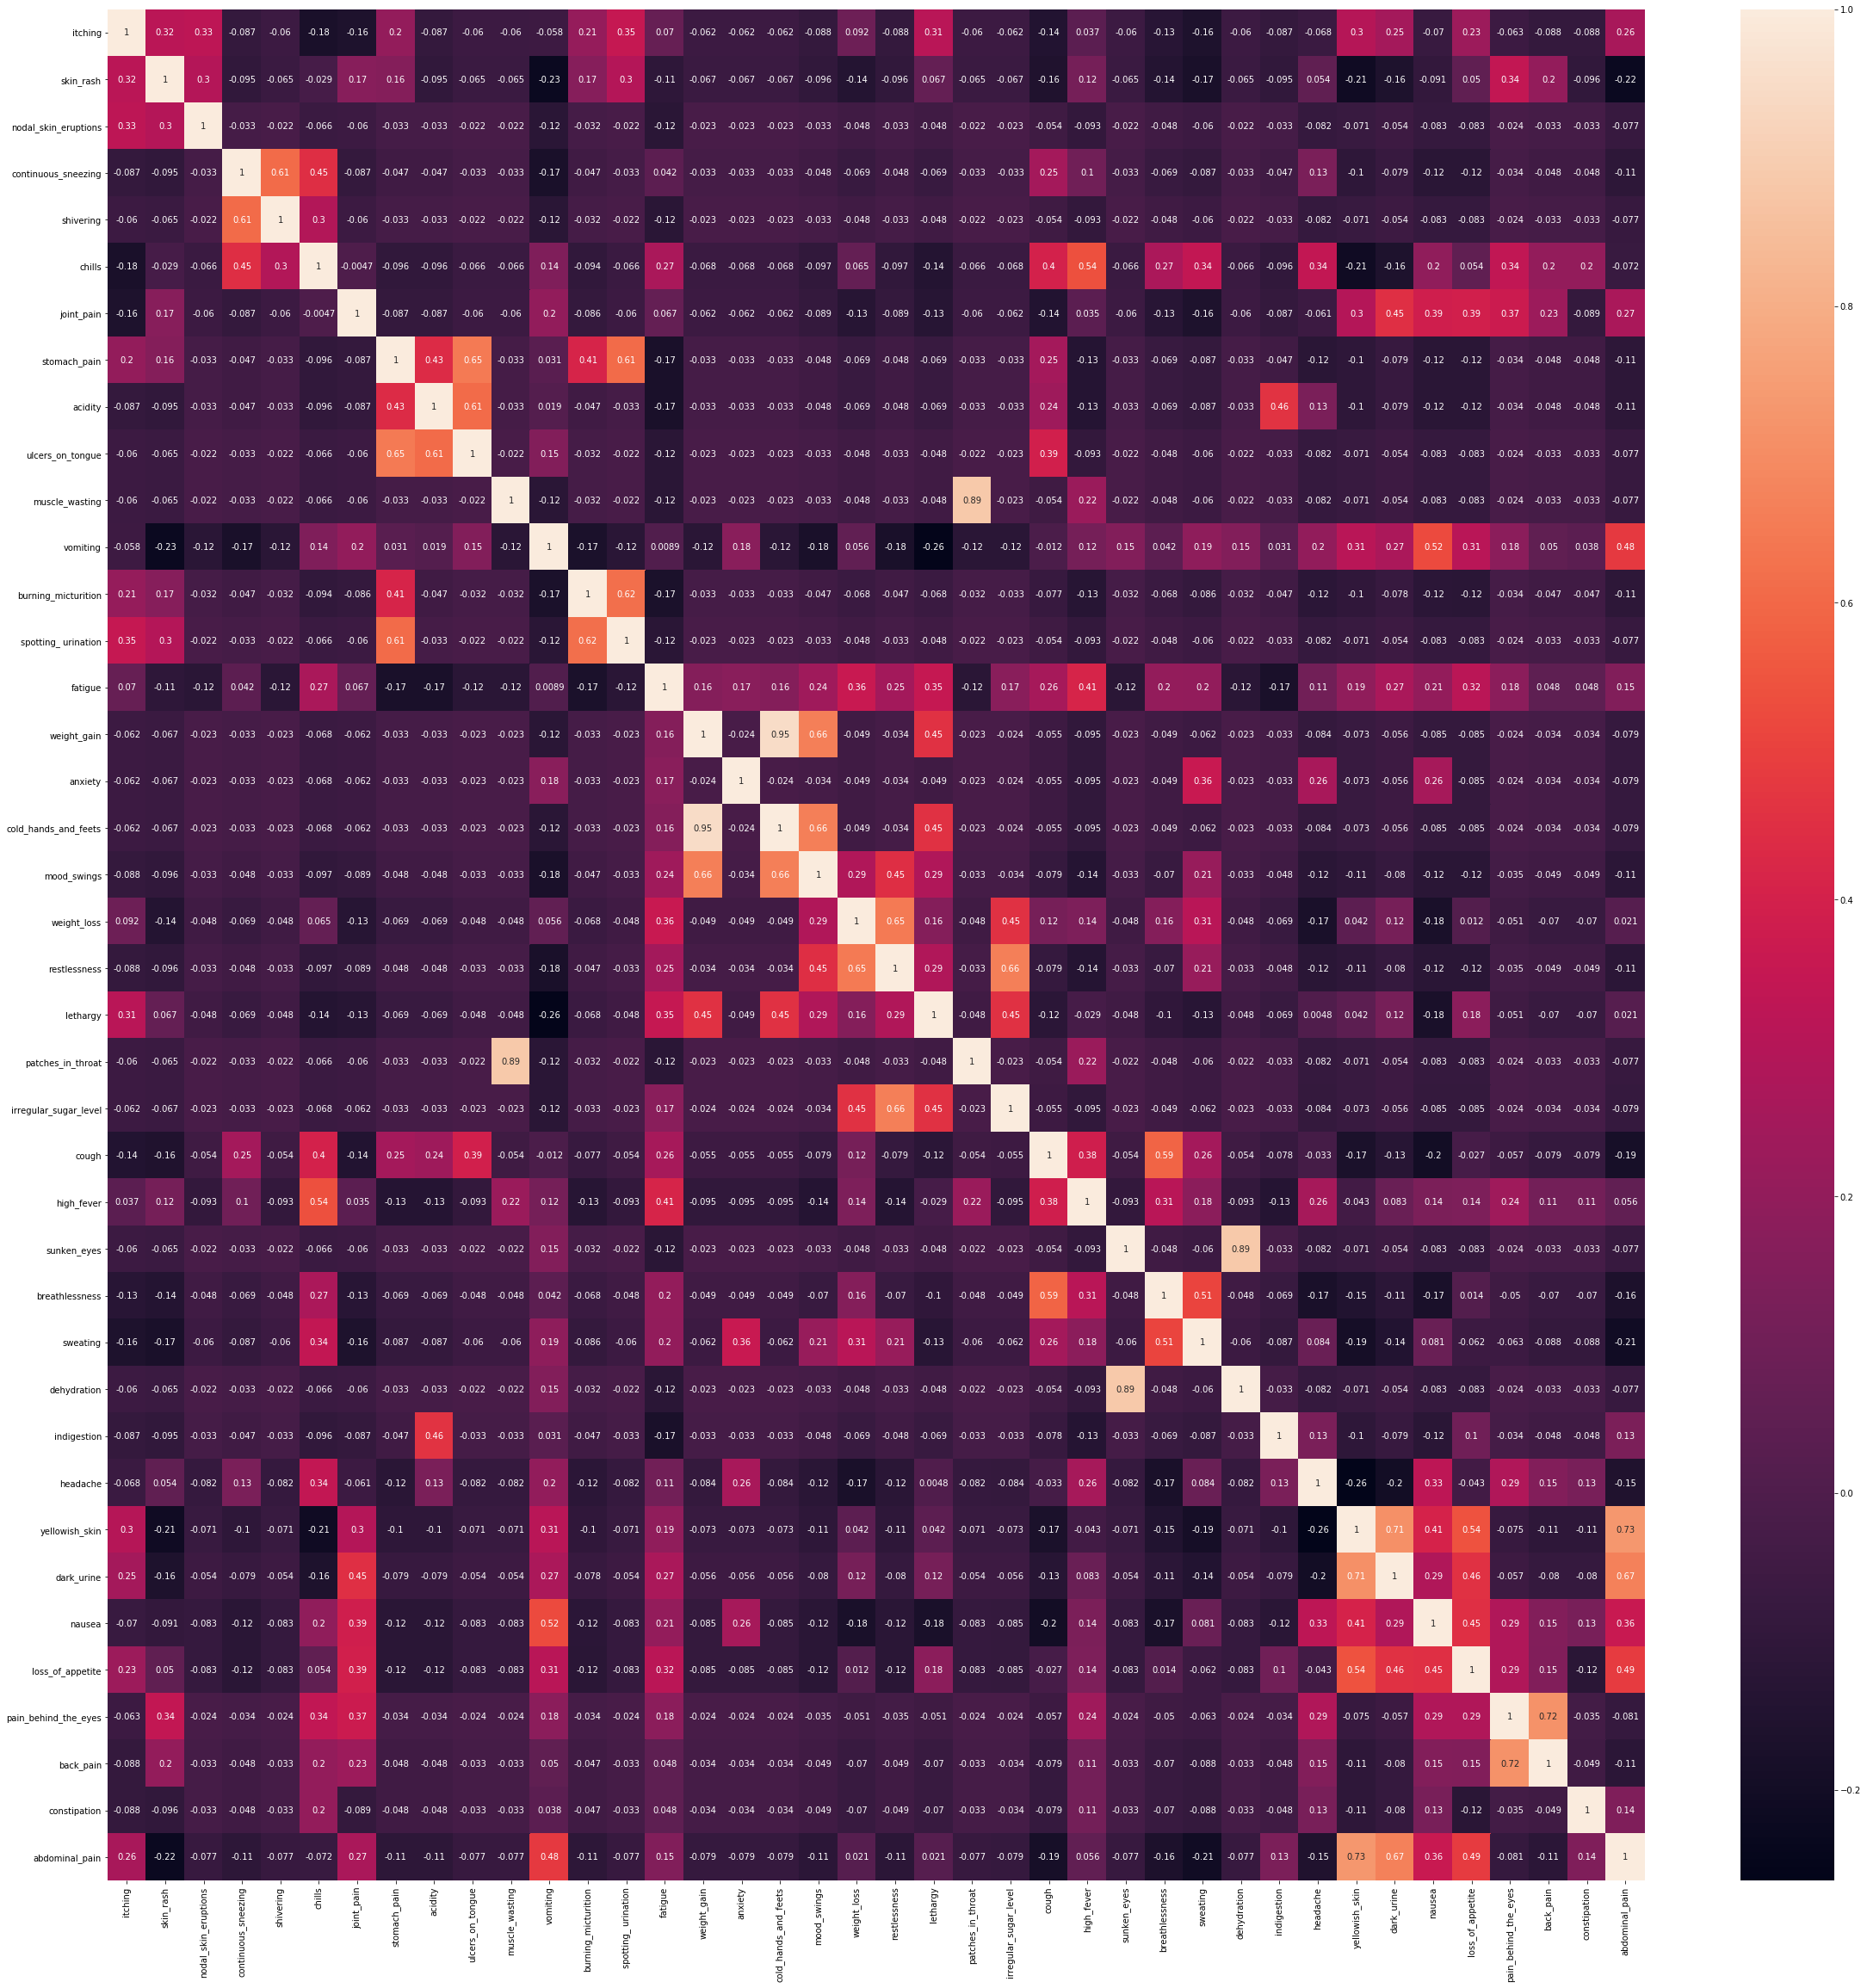

In [50]:
ds_matrix = train_ds.iloc[:,0:40] 
plt.figure(figsize = (40, 40)) 
sns.heatmap(ds_matrix.corr(), annot = True) 
plt.show()

In [56]:
ds = {'Symptoms': [], 'Diseases': [], 'count': []}
table = pd.DataFrame(ds)
table = table.astype({"Symptoms": str, "Diseases": object, 'count': int})
i = 0

for symp in sorted(train_ds.columns.tolist()[:-1]):
    Disease_list = train_ds[train_ds[symp] == 1].prognosis.unique().tolist()
    table = table.append({'Symptoms': symp}, {'Diseases': Disease_list}, {'count':len(Disease_list)}) 
    table.at[i,'Diseases'] = Disease_list
    table.at[i, 'count'] = len(Disease_list)
    i += 1
    
table.sort_values(by='count', ascending=False).head(10)

,Symptoms,Diseases,count
41,fatigue,"[Diabetes , Bronchial Asthma, Jaundice, Chicke...",17.0
122,vomiting,"[GERD, Chronic cholestasis, Peptic ulcer disea...",17.0
46,high_fever,"[AIDS, Bronchial Asthma, Jaundice, Malaria, Ch...",12.0
72,nausea,"[Chronic cholestasis, Malaria, Dengue, Typhoid...",10.0
61,loss_of_appetite,"[Chronic cholestasis, Peptic ulcer diseae, Chi...",10.0
45,headache,"[Hypertension , Migraine, Paralysis (brain hem...",10.0
0,abdominal_pain,"[Chronic cholestasis, Peptic ulcer diseae, Jau...",9.0
131,yellowish_skin,"[Chronic cholestasis, Jaundice, hepatitis A, H...",8.0
130,yellowing_of_eyes,"[Chronic cholestasis, hepatitis A, Hepatitis B...",7.0
101,skin_rash,"[Fungal infection, Drug Reaction, Chicken pox,...",7.0


In [68]:
table.sort_values(by='count', ascending=True).head(20)

,Symptoms,Diseases,count
42,fluid_overload,[],0.0
126,weight_gain,[Hypothyroidism],1.0
87,pus_filled_pimples,[Acne],1.0
86,puffy_face_and_eyes,[Hypothyroidism],1.0
85,prominent_veins_on_calf,[Varicose veins],1.0
84,polyuria,[Diabetes ],1.0
82,patches_in_throat,[AIDS],1.0
81,passage_of_gases,[Peptic ulcer diseae],1.0
80,palpitations,[Hypoglycemia],1.0
78,pain_in_anal_region,[Dimorphic hemmorhoids(piles)],1.0


In [66]:
train_ds[train_ds['fluid_overload.1'] == 1].prognosis

240     Alcoholic hepatitis
241     Alcoholic hepatitis
242     Alcoholic hepatitis
243     Alcoholic hepatitis
244     Alcoholic hepatitis
               ...         
4739    Alcoholic hepatitis
4780    Alcoholic hepatitis
4821    Alcoholic hepatitis
4862    Alcoholic hepatitis
4903    Alcoholic hepatitis
Name: prognosis, Length: 114, dtype: object

In [71]:
X = train_ds.iloc[:, 0:-1]
target = train_ds.prognosis
le = preprocessing.LabelEncoder()
le.fit(target.tolist())
y = le.transform(target)

In [75]:
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.2, random_state = 42)
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [93]:
# SVM-SVC Model
svc_model = SVC()
svc_model.fit(X_train,y_train)
test = svc_model.predict(X_test)
score_a = accuracy_score(y_test, test)
score_p = precision_score(y_test, test, average = 'micro')
print("Accuracy = {}%".format(score_a*100))
print("Precision = {}%".format(score_p*100))

Accuracy = 100.0%
Precision = 100.0%


In [90]:
test_X = test_ds.iloc[:, 0:-1]
test_target = test_ds.prognosis
le.fit(test_target.tolist())
test_y = le.transform(test_target)
test_on_test = svc_model.predict(test_X)
score_a_test = accuracy_score(test_y, test_on_test)
score_p_test = precision_score(test_y, test_on_test, average = 'micro')
print("Accuracy = {}%".format(score_a_test*100))
print("Precision = {}%".format(score_p_test*100))

Accuracy = 100.0%
Precision = 100.0%


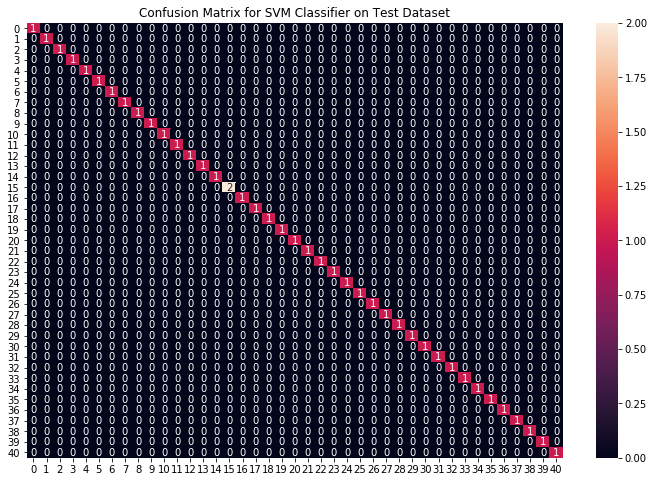

In [82]:
cf_matrix = confusion_matrix(test_y, test_on_test)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Dataset")
plt.show()

In [98]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_test = rf_model.predict(X_test)
score_a_rf = accuracy_score(y_test, rf_test)
score_p_rf = precision_score(y_test, rf_test, average = 'micro')
print("Accuracy = {}%".format(score_a_rf*100))
print("Precision = {}%".format(score_p_rf*100))

Accuracy = 100.0%
Precision = 100.0%


In [100]:
test_X_rf = test_ds.iloc[:, 0:-1]
test_target_rf = test_ds.prognosis
le.fit(test_target_rf.tolist())
test_y_rf = le.transform(test_target_rf)
test_on_test_rf = rf_model.predict(test_X_rf)
score_a_test_rf = accuracy_score(test_y_rf, test_on_test_rf)
score_p_test_rf = precision_score(test_y_rf, test_on_test_rf, average = 'micro')
print("Accuracy = {}%".format(score_a_test_rf*100))
print("Precision = {}%".format(score_p_test_rf*100))

Accuracy = 97.61904761904762%
Precision = 97.61904761904762%


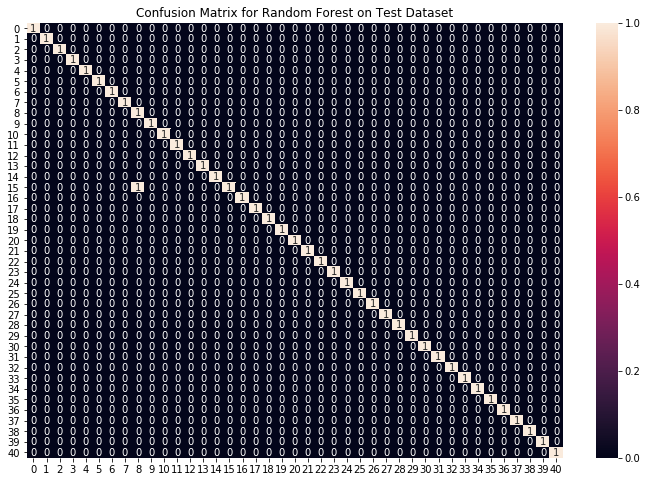

In [101]:
cf_matrix_rf = confusion_matrix(test_y_rf, test_on_test_rf)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_rf, annot=True)
plt.title("Confusion Matrix for Random Forest on Test Dataset")
plt.show()

In [103]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_test = knn_model.predict(X_test)
score_a_knn = accuracy_score(y_test, knn_test)
score_p_knn = precision_score(y_test, knn_test, average = 'micro')
print("Accuracy = {}%".format(score_a_knn*100))
print("Precision = {}%".format(score_p_knn*100))

Accuracy = 100.0%
Precision = 100.0%


In [104]:
test_X_knn = test_ds.iloc[:, 0:-1]
test_target_knn = test_ds.prognosis
le.fit(test_target_knn.tolist())
test_y_knn = le.transform(test_target_knn)
test_on_test_knn = knn_model.predict(test_X_knn)
score_a_test_knn = accuracy_score(test_y_knn, test_on_test_knn)
score_p_test_knn = precision_score(test_y_knn, test_on_test_knn, average = 'micro')
print("Accuracy = {}%".format(score_a_test_knn*100))
print("Precision = {}%".format(score_p_test_knn*100))

Accuracy = 100.0%
Precision = 100.0%


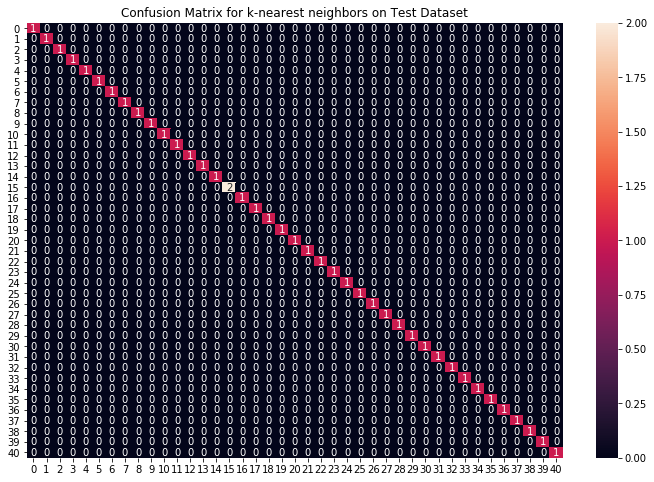

In [105]:
cf_matrix_knn = confusion_matrix(test_y_knn, test_on_test_knn)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_knn, annot=True)
plt.title("Confusion Matrix for k-nearest neighbors on Test Dataset")
plt.show()

In [107]:
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train, y_train)
lr_test = lr_model.predict(X_test)
score_a_lr = accuracy_score(y_test, lr_test)
score_p_lr = precision_score(y_test, lr_test, average = 'micro')
print("Accuracy = {}%".format(score_a_lr*100))
print("Precision = {}%".format(score_p_lr*100))

Accuracy = 100.0%
Precision = 100.0%


In [108]:
test_X_lr = test_ds.iloc[:, 0:-1]
test_target_lr = test_ds.prognosis
le.fit(test_target_lr.tolist())
test_y_lr = le.transform(test_target_lr)
test_on_test_lr = lr_model.predict(test_X_lr)
score_a_test_lr = accuracy_score(test_y_lr, test_on_test_lr)
score_p_test_lr = precision_score(test_y_lr, test_on_test_lr, average = 'micro')
print("Accuracy = {}%".format(score_a_test_lr*100))
print("Precision = {}%".format(score_p_test_lr*100))

Accuracy = 100.0%
Precision = 100.0%


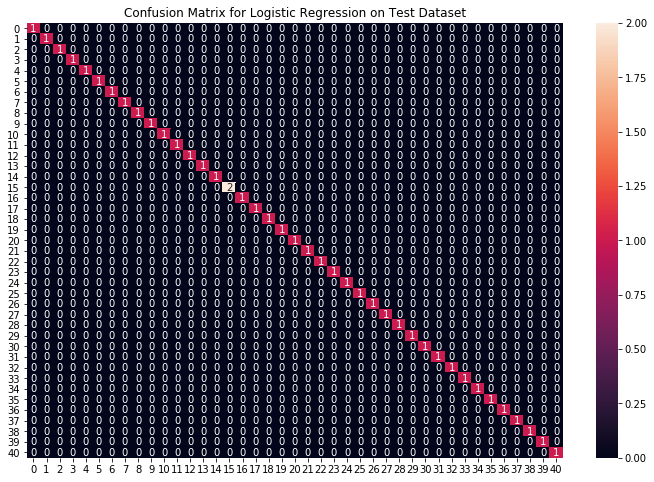

In [109]:
cf_matrix_lr = confusion_matrix(test_y_lr, test_on_test_lr)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_lr, annot=True)
plt.title("Confusion Matrix for Logistic Regression on Test Dataset")
plt.show()

In [111]:
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)
dt_test = dt_model.predict(X_test)
score_a_dt = accuracy_score(y_test, dt_test)
score_p_dt = precision_score(y_test, dt_test, average = 'micro')
print("Accuracy = {}%".format(score_a_dt*100))
print("Precision = {}%".format(score_p_dt*100))

Accuracy = 100.0%
Precision = 100.0%


In [112]:
test_X_dt = test_ds.iloc[:, 0:-1]
test_target_dt = test_ds.prognosis
le.fit(test_target_dt.tolist())
test_y_dt = le.transform(test_target_dt)
test_on_test_dt = dt_model.predict(test_X_dt)
score_a_test_dt = accuracy_score(test_y_dt, test_on_test_dt)
score_p_test_dt = precision_score(test_y_dt, test_on_test_dt, average = 'micro')
print("Accuracy = {}%".format(score_a_test_dt*100))
print("Precision = {}%".format(score_p_test_dt*100))

Accuracy = 97.61904761904762%
Precision = 97.61904761904762%


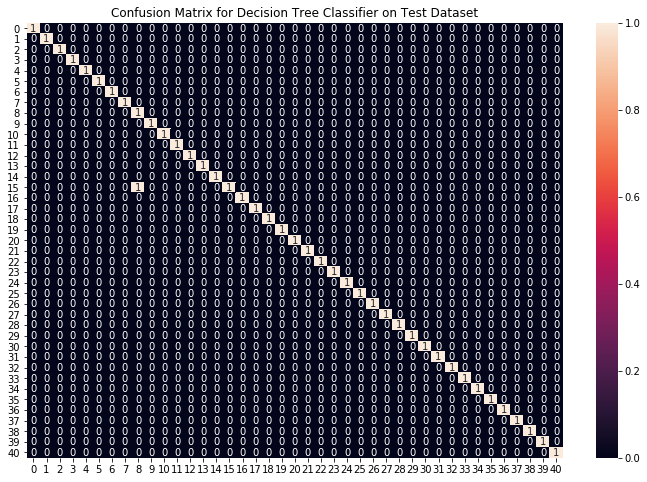

In [113]:
cf_matrix_dt = confusion_matrix(test_y_dt, test_on_test_dt)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_dt, annot=True)
plt.title("Confusion Matrix for Decision Tree Classifier on Test Dataset")
plt.show()

In [115]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_test = nb_model.predict(X_test)
score_a_nb = accuracy_score(y_test, nb_test)
score_p_nb = precision_score(y_test, nb_test, average = 'micro')
print("Accuracy = {}%".format(score_a_nb*100))
print("Precision = {}%".format(score_p_nb*100))

Accuracy = 100.0%
Precision = 100.0%


In [116]:
test_X_nb = test_ds.iloc[:, 0:-1]
test_target_nb = test_ds.prognosis
le.fit(test_target_nb.tolist())
test_y_nb = le.transform(test_target_nb)
test_on_test_nb = nb_model.predict(test_X_nb)
score_a_test_nb = accuracy_score(test_y_nb, test_on_test_nb)
score_p_test_nb = precision_score(test_y_nb, test_on_test_nb, average = 'micro')
print("Accuracy = {}%".format(score_a_test_nb*100))
print("Precision = {}%".format(score_p_test_nb*100))

Accuracy = 100.0%
Precision = 100.0%


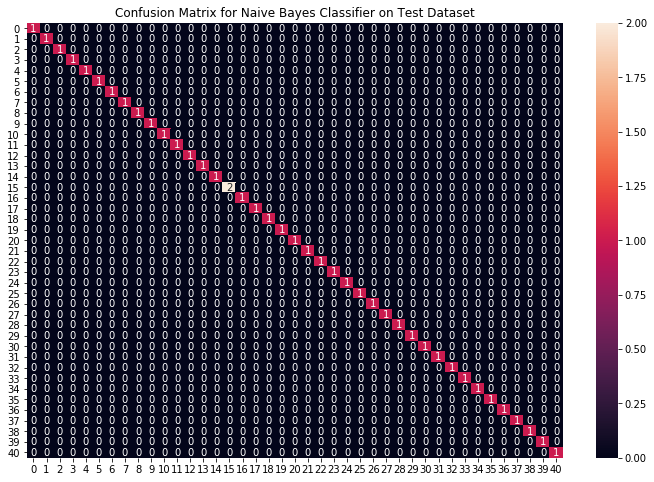

In [117]:
cf_matrix_nb = confusion_matrix(test_y_nb, test_on_test_nb)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_nb, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Dataset")
plt.show()

In [126]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_test = xgb_model.predict(X_test)
score_a_xgb = accuracy_score(y_test, xgb_test)
score_p_xgb = precision_score(y_test, xgb_test, average = 'micro')
print("Accuracy = {}%".format(score_a_xgb*100))
print("Precision = {}%".format(score_p_xgb*100))

Accuracy = 100.0%
Precision = 100.0%


In [127]:
test_X_xgb = test_ds.iloc[:, 0:-1]
test_target_xgb = test_ds.prognosis
le.fit(test_target_xgb.tolist())
test_y_xgb = le.transform(test_target_xgb)
test_on_test_xgb = xgb_model.predict(test_X_xgb)
score_a_test_xgb = accuracy_score(test_y_xgb, test_on_test_xgb)
score_p_test_xgb = precision_score(test_y_xgb, test_on_test_xgb, average = 'micro')
print("Accuracy = {}%".format(score_a_test_xgb*100))
print("Precision = {}%".format(score_p_test_xgb*100))

Accuracy = 97.61904761904762%
Precision = 97.61904761904762%


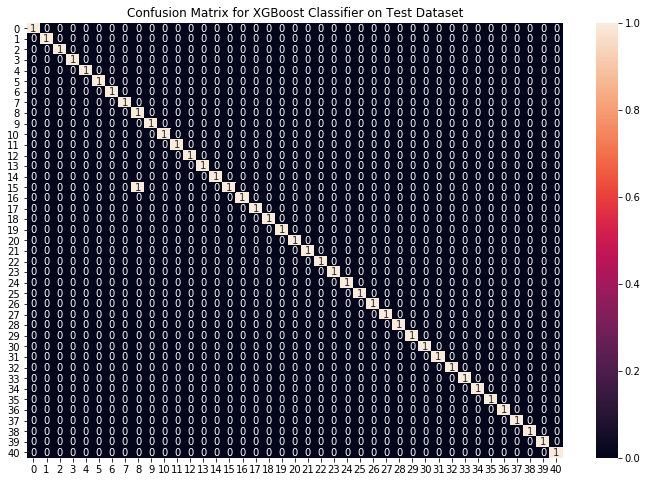

In [128]:
cf_matrix_xgb = confusion_matrix(test_y_xgb, test_on_test_xgb)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_xgb, annot=True)
plt.title("Confusion Matrix for XGBoost Classifier on Test Dataset")
plt.show()

In [132]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
sgd_test = sgd_model.predict(X_test)
score_a_sgd = accuracy_score(y_test, sgd_test)
score_p_sgd = precision_score(y_test, sgd_test, average = 'micro')
print("Accuracy = {}%".format(score_a_sgd*100))
print("Precision = {}%".format(score_p_sgd*100))

Accuracy = 100.0%
Precision = 100.0%


In [133]:
test_X_sgd = test_ds.iloc[:, 0:-1]
test_target_sgd = test_ds.prognosis
le.fit(test_target_sgd.tolist())
test_y_sgd = le.transform(test_target_sgd)
test_on_test_sgd = sgd_model.predict(test_X_sgd)
score_a_test_sgd = accuracy_score(test_y_sgd, test_on_test_sgd)
score_p_test_sgd = precision_score(test_y_sgd, test_on_test_sgd, average = 'micro')
print("Accuracy = {}%".format(score_a_test_sgd*100))
print("Precision = {}%".format(score_p_test_sgd*100))

Accuracy = 100.0%
Precision = 100.0%


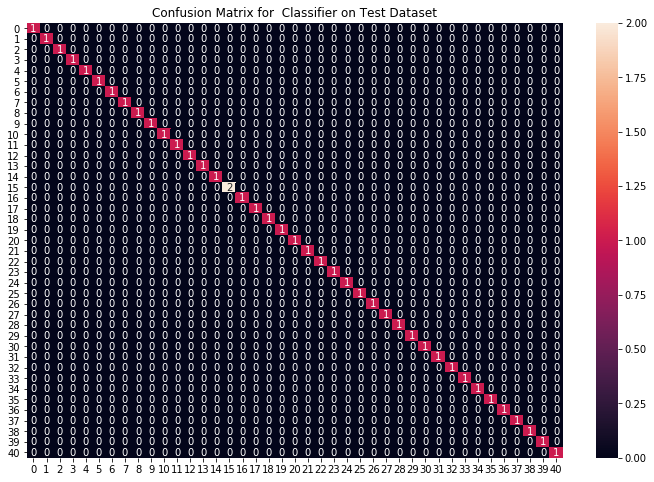

In [134]:
cf_matrix_sgd = confusion_matrix(test_y_sgd, test_on_test_sgd)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_sgd, annot=True)
plt.title("Confusion Matrix for  Classifier on Test Dataset")
plt.show()

In [137]:
symptoms = X.columns.values 

symptom_index = {} 
for index, value in enumerate(symptoms): 
    symptom = " ".join([i.capitalize() for i in value.split("_")]) 
    symptom_index[symptom] = index 

dataset_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":le.classes_
}

In [138]:
print(dataset_dict)

{'symptom_index': {'Itching': 0, 'Skin Rash': 1, 'Nodal Skin Eruptions': 2, 'Continuous Sneezing': 3, 'Shivering': 4, 'Chills': 5, 'Joint Pain': 6, 'Stomach Pain': 7, 'Acidity': 8, 'Ulcers On Tongue': 9, 'Muscle Wasting': 10, 'Vomiting': 11, 'Burning Micturition': 12, 'Spotting  urination': 13, 'Fatigue': 14, 'Weight Gain': 15, 'Anxiety': 16, 'Cold Hands And Feets': 17, 'Mood Swings': 18, 'Weight Loss': 19, 'Restlessness': 20, 'Lethargy': 21, 'Patches In Throat': 22, 'Irregular Sugar Level': 23, 'Cough': 24, 'High Fever': 25, 'Sunken Eyes': 26, 'Breathlessness': 27, 'Sweating': 28, 'Dehydration': 29, 'Indigestion': 30, 'Headache': 31, 'Yellowish Skin': 32, 'Dark Urine': 33, 'Nausea': 34, 'Loss Of Appetite': 35, 'Pain Behind The Eyes': 36, 'Back Pain': 37, 'Constipation': 38, 'Abdominal Pain': 39, 'Diarrhoea': 40, 'Mild Fever': 41, 'Yellow Urine': 42, 'Yellowing Of Eyes': 43, 'Acute Liver Failure': 44, 'Fluid Overload': 45, 'Swelling Of Stomach': 46, 'Swelled Lymph Nodes': 47, 'Malaise'

In [144]:
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(dataset_dict["symptom_index"])
    for symptom in symptoms:
        index = dataset_dict["symptom_index"][symptom]
        input_data[index] = 1

    input_data = np.array(input_data).reshape(1,-1)
    
    svc_prediction = data_dict["predictions_classes"][svc_model.predict(input_data)[0]]
    rf_prediction = data_dict["predictions_classes"][rf_model.predict(input_data)[0]]
    knn_prediction = data_dict["predictions_classes"][knn_model.predict(input_data)[0]]
    lr_prediction = data_dict["predictions_classes"][lr_model.predict(input_data)[0]]
    dt_prediction = data_dict["predictions_classes"][dt_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][nb_model.predict(input_data)[0]]
    xgb_prediction = data_dict["predictions_classes"][xgb_model.predict(input_data)[0]]
    sgd_prediction = data_dict["predictions_classes"][sgd_model.predict(input_data)[0]]
    
     
    # making final prediction by taking mode of all predictions
    final_prediction = mode([svc_prediction, rf_prediction, knn_prediction, lr_prediction, 
                             dt_prediction, nb_prediction, xgb_prediction, sgd_prediction])[0][0]
    predictions = {
        "SVC model prediction": svc_prediction,
        "Random Forest model prediction": rf_prediction,
        "KNN model prediction": knn_prediction,
        "Logistic Regression model prediction": lr_prediction,
        "Decision Tree Classifier model prediction": dt_prediction,
        "Naive Bayes model prediction": nb_prediction,
        "XGBoost model prediction": xgb_prediction,
        "Stochastic Gradient Descent model prediction": sgd_prediction,
        "Final Disease prediction": final_prediction
    }
    return predictions


In [155]:
print(predictDisease("Itching,Skin Rash,Dischromic  Patches,Skin Peeling,Red Sore Around Nose"))

{'SVC model prediction': 'Fungal infection', 'Random Forest model prediction': 'Fungal infection', 'KNN model prediction': 'Fungal infection', 'Logistic Regression model prediction': 'Fungal infection', 'Decision Tree Classifier model prediction': 'Fungal infection', 'Naive Bayes model prediction': 'Fungal infection', 'XGBoost model prediction': 'Fungal infection', 'Stochastic Gradient Descent model prediction': 'Fungal infection', 'Final Disease prediction': 'Fungal infection'}
